In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
fashion_train_df=pd.read_csv("fashion-mnist_train.csv")

In [4]:
fashion_test_df=pd.read_csv("fashion-mnist_test.csv")

In [5]:
fashion_train_df.shape

(60000, 785)

In [6]:
fashion_test_df.shape

(10000, 785)

In [7]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# data visvalization

In [8]:
training=np.array(fashion_train_df)
testing=np.array(fashion_test_df)

7

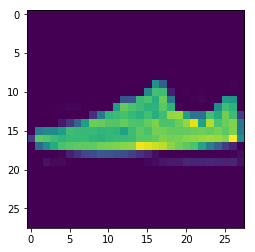

In [9]:

i=np.random.randint(1,60000)
plt.imshow(training[i,1:].reshape(28,28))
label=training[i,0]
label

# we have used ravel to flatten the values of axes because axes is used to put values into our subplots starting from 0 to 225

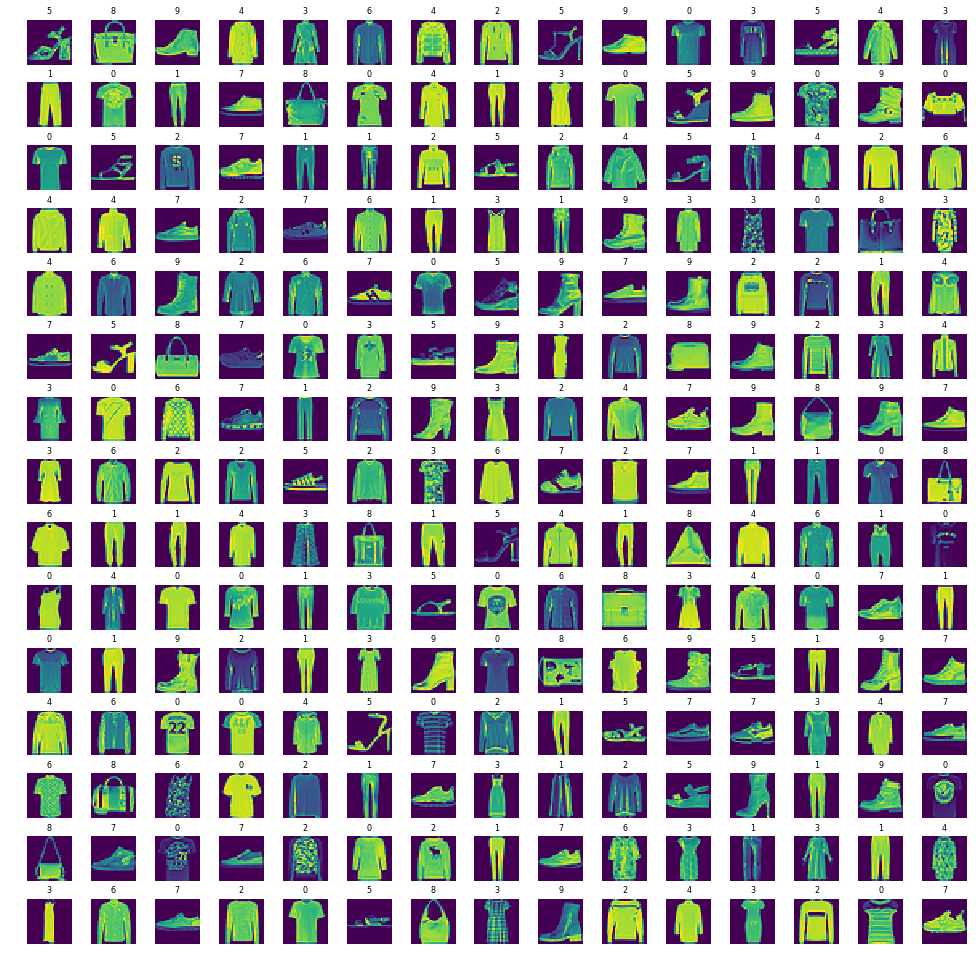

In [10]:
w_grid=15
l_grid=15

fig,axes=plt.subplots(l_grid,w_grid,figsize=(17,17))
axes=axes.ravel()
n_training=len(training)
for i in np.arange(0,w_grid*l_grid):
    index=np.random.randint(0,n_training)
    
    axes[i].imshow(training[index,1:].reshape((28,28)))
    axes[i].set_title(training[index,0],fontsize=8)
    axes[i].axis("off")
                   
    
plt.subplots_adjust(hspace=0.4)    

# model making

1. convolution followed by relu function

2. maximum pooling[feature extraction]

3. flattening

4. create neural network and get output

In [11]:
!pip install keras

WE DIVIDE BY 255 to Normalize our values to avoid destortion,shadows.Divide by 255 bcz in a grayscale image value varies from [0,255] only

In [12]:
x_train=training[:,1:]/255
y_train=training[:,0]


In [13]:
x_test=testing[:,1:]/255
y_test=testing[:,0]

In [14]:
from sklearn.model_selection import train_test_split
X_train,x_validate,Y_train,y_validate=train_test_split(x_train,y_train,train_size=0.7,random_state=100)

C:\Users\bipen adhikari\anaconda\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


we want to reshape the data so that we can apply convolcation (28,28,1)

The images are 28x28 and 1 color channel (i.e. grayscale rather than something like 3 for RGB)

In [15]:
X_train=X_train.reshape(X_train.shape[0],28,28,1)

In [16]:
x_test=x_test.reshape(x_test.shape[0],28,28,1)

In [17]:
x_validate=x_validate.reshape(x_validate.shape[0],28,28,1)

In [18]:
x_validate.shape

(18000, 28, 28, 1)

In [19]:
!pip install tensorFlow

  Retrying (Retry(total=4, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<pip._vendor.urllib3.connection.VerifiedHTTPSConnection object at 0x0000027BE5A20EF0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed')': /simple/tensorboard/
  Retrying (Retry(total=3, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<pip._vendor.urllib3.connection.VerifiedHTTPSConnection object at 0x0000027BE5A20518>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed')': /simple/tensorboard/
  Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<pip._vendor.urllib3.connection.VerifiedHTTPSConnection object at 0x0000027BE5A335C0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed')': /simple/tensorboard/
  Retrying (Retry(total=1, connect=None, read=None, redirect=Non

In [20]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard


In [21]:
cm_model=Sequential()
cm_model.add(Conv2D(32,3,3,input_shape=(28,28,1),activation="relu"))


Instructions for updating:
Colocations handled automatically by placer.


C:\Users\bipen adhikari\anaconda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  


1.Dense decides the no of neurons we want after our input layer using relu

2.dense will creae 10 neurons at output using sigmoid

In [22]:
cm_model.add(MaxPooling2D(pool_size=(2,2)))
cm_model.add(Flatten())
cm_model.add(Dense(output_dim=32,activation="relu",))
cm_model.add(Dense(output_dim=10,activation="sigmoid",))

C:\Users\bipen adhikari\anaconda\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\bipen adhikari\anaconda\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  after removing the cwd from sys.path.


In [23]:
cm_model.compile(loss="sparse_categorical_crossentropy",optimizer=Adam(lr=0.001),metrics=["accuracy"])

HOW MANY TIMES WE R UPDATING OUR WEIGTS IS TOLD BY EPOCHS

In [24]:
epochs=50

In [25]:
cm_model.fit(X_train,Y_train,batch_size=512,nb_epoch=epochs,verbose=1,validation_data=(x_validate,y_validate))

Instructions for updating:
Use tf.cast instead.


C:\Users\bipen adhikari\anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 42000 samples, validate on 18000 samples
Epoch 1/50
42000/42000 [==============================] - 29s 700us/step - loss: 0.9918 - acc: 0.6478 - val_loss: 0.5664 - val_acc: 0.8018
Epoch 2/50
42000/42000 [==============================] - 28s 675us/step - loss: 0.4749 - acc: 0.8347 - val_loss: 0.4498 - val_acc: 0.8420
Epoch 3/50
42000/42000 [==============================] - 29s 701us/step - loss: 0.4080 - acc: 0.8577 - val_loss: 0.4078 - val_acc: 0.8571
Epoch 4/50
42000/42000 [==============================] - 28s 674us/step - loss: 0.3709 - acc: 0.8710 - val_loss: 0.4314 - val_acc: 0.8383
Epoch 5/50
42000/42000 [==============================] - 28s 664us/step - loss: 0.3565 - acc: 0.8751 - val_loss: 0.3411 - val_acc: 0.8817
Epoch 6/50
42000/42000 [==============================] - 28s 662us/step - loss: 0.3341 - acc: 0.8837 - val_loss: 0.3429 - val_acc: 0.8769
Epoch 7/50
42000/42000 [==============================] - 28s 674us/step - loss: 0.3173 - acc: 0.8881 - val_loss: 0.

In [26]:
evaluation=cm_model.evaluate(x_test,y_test)
print("test accuracy: {:.3f}".format(evaluation[1]))

10000/10000 [==============================] - 3s 275us/step
test accuracy: 0.913


In [27]:
predicted_y=cm_model.predict_classes(x_test)

In [28]:
predicted_y

array([0, 1, 6, ..., 8, 8, 1], dtype=int64)

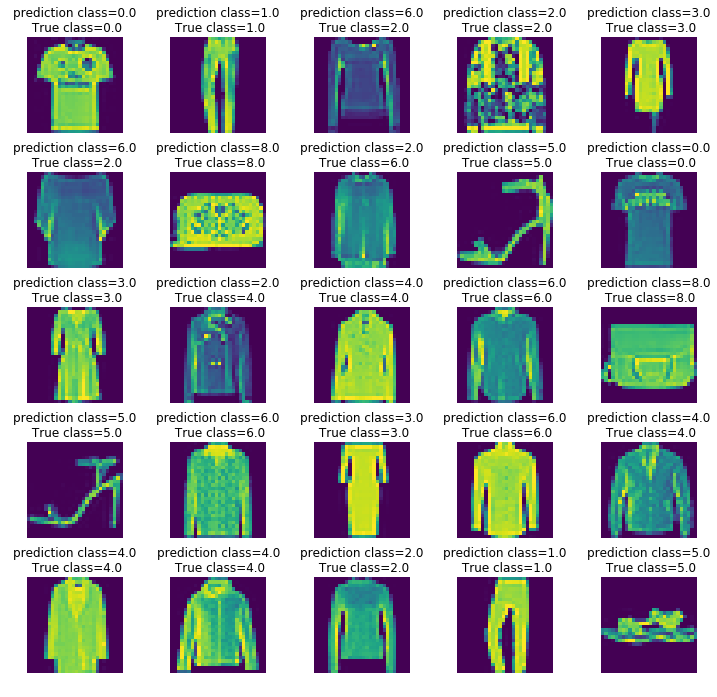

In [29]:
l=5
w=5
fig,axes=plt.subplots(l,w,figsize=(12,12))
axes=axes.ravel()

for i in np.arange(l*w):
    axes[i].imshow(x_test[i].reshape(28,28))
    axes[i].set_title("prediction class={:0.1f}\n True class={:0.1f}".format(predicted_y[i],y_test[i]))
    axes[i].axis("off")
    
plt.subplots_adjust(wspace=0.5)    
                      

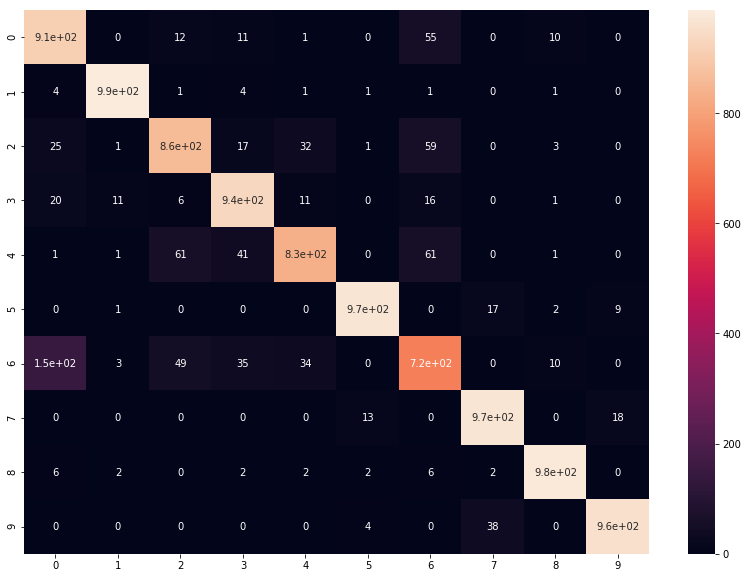

In [30]:
from sklearn.metrics import confusion_matrix 
cm=confusion_matrix(y_test,predicted_y)
plt.figure(figsize=(14,10))
sns.heatmap(cm,annot=True)

# improving model
1. we can increase the no of kernels or feature detectors

2.Drop Out Technique: in drop out technique we just drop out some neurons to make our model generalized and free from overfitting as neurons are highly depnd on each other so we have to overcome it

In [31]:
cm2=Sequential()
cm2.add(Conv2D(64,3,3 , input_shape=(28,28,1) , activation="relu"))

C:\Users\bipen adhikari\anaconda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  


In [32]:
cm2.add(MaxPooling2D(2,2))
cm2.add(Flatten())

In [33]:
from keras.layers import Dropout
cm2.add(Dense(23,activation="relu"))
cm2.add(Dropout(0.2))
cm2.add(Dense(23,activation="relu"))
cm2.add(Dropout(0.4))
cm2.add(Dense(10,activation="sigmoid"))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [34]:
cm2.compile(loss="sparse_categorical_crossentropy",optimizer=Adam(lr=0.001),metrics=["accuracy"])
cm2.fit(X_train,Y_train,batch_size=512, epochs=40,verbose=1,validation_data=(x_validate,y_validate))

Train on 42000 samples, validate on 18000 samples
Epoch 1/40
42000/42000 [==============================] - 53s 1ms/step - loss: 1.8804 - acc: 0.2596 - val_loss: 1.3298 - val_acc: 0.6458
Epoch 2/40
42000/42000 [==============================] - 50s 1ms/step - loss: 1.3898 - acc: 0.5119 - val_loss: 0.8191 - val_acc: 0.7621
Epoch 3/40
42000/42000 [==============================] - 51s 1ms/step - loss: 1.0655 - acc: 0.6122 - val_loss: 0.6044 - val_acc: 0.7879
Epoch 4/40
42000/42000 [==============================] - 51s 1ms/step - loss: 0.8958 - acc: 0.6683 - val_loss: 0.5486 - val_acc: 0.7924
Epoch 5/40
42000/42000 [==============================] - 51s 1ms/step - loss: 0.8107 - acc: 0.6994 - val_loss: 0.5088 - val_acc: 0.8060
Epoch 6/40
42000/42000 [==============================] - 50s 1ms/step - loss: 0.7463 - acc: 0.7236 - val_loss: 0.4802 - val_acc: 0.8083
Epoch 7/40
42000/42000 [==============================] - 51s 1ms/step - loss: 0.7025 - acc: 0.7407 - val_loss: 0.4579 - val_acc